# Which genes are most strongly differentially expressed between basal and non-basal breast cancer samples?

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv("breastcancer.csv")


In [4]:
df.shape
df.head()


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [5]:
df['basal_status'] = (df['type'] == 'basal').astype(int)

df['basal_status'].value_counts()


,count
basal_status,
0,110
1,41


In [6]:
meta_cols = ['samples', 'type', 'basal_status']
gene_cols = [col for col in df.columns if col not in meta_cols]

In [7]:
len(gene_cols)


54675

In [8]:
results = []


In [9]:
for gene in gene_cols:
    basal_vals = df[df['basal_status'] == 1][gene]
    nonbasal_vals = df[df['basal_status'] == 0][gene]

    mean_diff = basal_vals.mean() - nonbasal_vals.mean()
    t_stat, p_val = ttest_ind(basal_vals, nonbasal_vals, equal_var=False)

    results.append([gene, mean_diff, p_val])


KeyboardInterrupt: 

In [10]:
basal_df = df[df['basal_status'] == 1]
nonbasal_df = df[df['basal_status'] == 0]


In [11]:
mean_diffs = []

for gene in gene_cols:
    diff = basal_df[gene].mean() - nonbasal_df[gene].mean()
    mean_diffs.append([gene, diff])

mean_df = pd.DataFrame(mean_diffs, columns=['Gene', 'Mean_Difference'])
mean_df['Abs_Mean_Diff'] = mean_df['Mean_Difference'].abs()
mean_df = mean_df.sort_values('Abs_Mean_Diff', ascending=False)


In [12]:
from scipy.stats import ttest_ind

top_genes = mean_df.head(200)['Gene']

stats = []

for gene in top_genes:
    t_stat, p_val = ttest_ind(
        basal_df[gene],
        nonbasal_df[gene],
        equal_var=False
    )
    stats.append([gene, p_val])

stats_df = pd.DataFrame(stats, columns=['Gene', 'P_Value'])
final_df = mean_df.merge(stats_df, on='Gene')


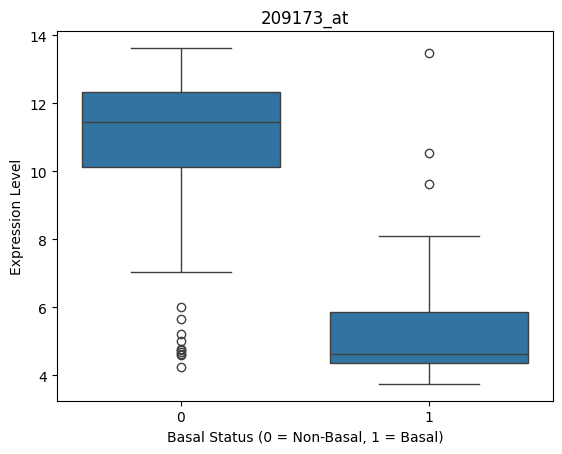

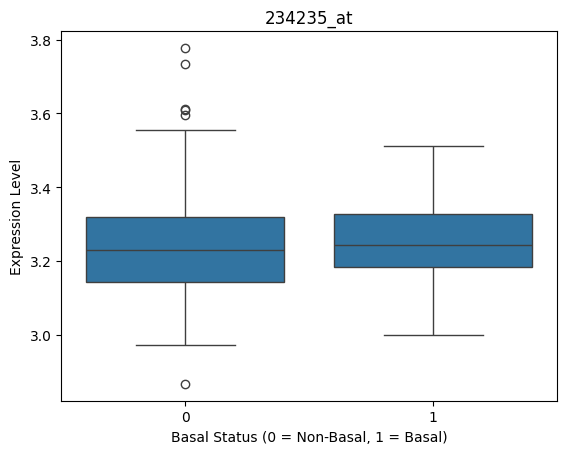

In [13]:
top_up = mean_df.iloc[0]['Gene']
top_down = mean_df.iloc[-1]['Gene']

import seaborn as sns
import matplotlib.pyplot as plt

for gene in [top_up, top_down]:
    sns.boxplot(x=df['basal_status'], y=df[gene])
    plt.title(gene)
    plt.xlabel('Basal Status (0 = Non-Basal, 1 = Basal)')
    plt.ylabel('Expression Level')
    plt.show()


The boxplots show the genes most strongly differentially expressed between basal and non-basal breast cancer samples. Probe 209173_at is highly expressed in basal samples, indicating it is upregulated in the basal subtype. Probe 234235_at shows slightly higher expression in non-basal samples, but overall expression is low in both subtypes. This suggests that, although statistically detectable, this gene is likely not a major contributor to basal vs non-basal differences.